In [6]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import time
import timeit


## Lab Book 01

In [9]:
x = np.linspace(1, 5, 5)
print(x)
A = (np.linspace(1, 9, 9)).reshape((3, 3))
print(A)


[1. 2. 3. 4. 5.]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [11]:
print(
    f"||x||_1 = {np.linalg.norm(x, ord=1)}\n||x||_2 = {np.linalg.norm(x, ord=2)}")
print(f"||x|| defult = {np.linalg.norm(x)}")
print(f"||A||_1 = {np.linalg.norm(A, ord=1)} \n||A||_2 = {np.linalg.norm(A, ord=2)}\n||A||_inf = {np.linalg.norm(A, ord=np.inf)}")
print(f"||A||_frobenius = {np.linalg.norm(A, ord='fro')}")
print(f"||A|| defult = {np.linalg.norm(A)}")


||x||_1 = 15.0
||x||_2 = 7.416198487095663
||x|| defult = 7.416198487095663
||A||_1 = 18.0 
||A||_2 = 16.84810335261421
||A||_inf = 24.0
||A||_frobenius = 16.881943016134134
||A|| defult = 16.881943016134134


The default choice for vector's norm is its l2 norm.
The default chioce for matrix's norm is its frobenius norm.

## Lab Book 02

In [4]:
# Create an example 6*6 linear system (related to elastic membranes)
n = 6
A = np.diag(np.ones(n-1), -1) - 2*np.diag(np.ones(n)) + \
    np.diag(np.ones(n-1), 1)
b = np.ones(n)
# Calculate LU factorisation
lu, piv = linalg.lu_factor(A)
# Solve a linear system using a previously computed LU factorisation
x = linalg.lu_solve((lu, piv), b)
print(f"The solution x is {x}")
print(f"LU\n{lu}\nP\n{piv}")


The solution x is [-3. -5. -6. -6. -5. -3.]
LU
[[-2.          1.          0.          0.          0.          0.        ]
 [-0.5        -1.5         1.          0.          0.          0.        ]
 [-0.         -0.66666667 -1.33333333  1.          0.          0.        ]
 [-0.         -0.         -0.75       -1.25        1.          0.        ]
 [-0.         -0.         -0.         -0.8        -1.2         1.        ]
 [-0.         -0.         -0.         -0.         -0.83333333 -1.16666667]]
P
[0 1 2 3 4 5]


In [5]:
residual = np.linalg.norm((A@x - b), ord=2)
print(f"The residual is {residual}")


The residual is 1.7763568394002505e-15


LU is the combination of L and U, where the upper triangular part of LU including the diagonal is U and the lower triangular matrix of LU with diagonal of 1s is L. Since LU can store all the information of both L and U without loss. We don't need to save them seperately each time.

P is stored in piv which can be read as the index of pivot in each row, like piv:[0,1,2] stands for P: [[1,0,0],[0,1,0],[0,0,1]].

## Lab Book 03

In [6]:
def geneHilbert(size):
    A = np.zeros([size, size])
    for i in range(size):
        for j in range(size):
            A[i][j] = 1 / (i + j + 1)
    return A


In [7]:
n = 15

A = geneHilbert(15)
xtrue = np.ones((n,))
b = A @ xtrue              # RHS of Ax=b with known solution xtrue
print(b)
x = np.linalg.solve(A, b)  # Gaussian Elimination with partial pivoting
print(x)
print("Relative error of np.linalg.solve =",
      np.linalg.norm(x - xtrue) / np.linalg.norm(xtrue))
lu, piv = linalg.lu_factor(A)
xdash = linalg.lu_solve((lu, piv), b)
print(xdash)
print(
    f"the determinant of A is {np.linalg.det(A)}, which is colse to 0.\nTherefore it is almost a singular matrix.")


[3.31822899 2.38072899 1.93955252 1.66177474 1.46440632 1.31440632
 1.1953587  1.09795611 1.01643437 0.94698992 0.88698992 0.83454237
 0.78824608 0.74703728 0.71009147]
[  1.00000005   0.99999302   1.00024845   0.99635976   1.02582299
   0.91929014   0.94139796   2.48103462  -5.07361829  14.857887
 -19.1097392   20.00938864 -10.37747099   4.9248948    0.40451104]
Relative error of np.linalg.solve = 8.725818712797583
[  1.00000005   0.99999302   1.00024845   0.99635976   1.02582299
   0.91929014   0.94139796   2.48103462  -5.07361829  14.857887
 -19.1097392   20.00938864 -10.37747099   4.9248948    0.40451104]
the determinant of A is -1.2321076338246708e-120, which is colse to 0.
Therefore it is almost a singular matrix.


Since the determinant of Hilbert matrix is extremly small, itself is an ill-conditioned matrix. Therefore, when we are computing the solution by np.linalg.solve, Hilbert matrix will possibly lead to numeric errors, especially when we try to find its inverse, there will be a large floating point number error. There will also have a lot of rounding errors due to the feature of Hilbert matrix. The error also changes with the size of the matrix, the larger the size is, the larger the error is.

## Lab Book 04

In [8]:
def lu_factorisation(A):

    n = A.shape[0]  # dimension of A

    P = np.eye(n, dtype='float64')   # P starts as the identity matrix
    L = np.eye(n, dtype='float64')   # L starts as the identity matrix
    U = A.copy().astype('float64')  # U starts as A (we will put in zeros as we go)
    for k in range(n-1):    # column of U where we are adding zeros
        max = np.argmax(abs(U[k:, k:(k+1)])) + k
        U[[k, max], :] = U[[max, k], :]
        P[[k, max], :] = P[[max, k], :]
        for i in range(k+1, n):  # row of U to add zero
            L[[k, max], :(k)] = L[[max, k], :(k)]   # Turn E to E~
            L[i, k] = U[i, k] / U[k, k]   # entry of L to zero out U[i,k]
            for j in range(k, n):   # apply row operation to nonzero part of row i
                U[i, j] = U[i, j] - L[i, k]*U[k, j]
    return P, L, U


In [9]:
A = np.array([[1, 1, 1], [2, 2, 5], [4, 6, 8]])
# A = np.array([[2,4,-2]
#             ,[4,9,-3]
#             ,[-2,-3,7]])
b = np.linspace(1, 3, 3)
# b = np.linspace(2,8,10)
print(f"A\n{A}\nb\n{b}")


A
[[1 1 1]
 [2 2 5]
 [4 6 8]]
b
[1. 2. 3.]


In [10]:
P1, L1, U1 = lu_factorisation(A)
print(f"My solver:\nP\n{P1}\nL\n{L1}\nU\n{U1}")
P2, L2, U2 = linalg.lu(A)
print(f"\nscipy.linalg.lu:\nP\n{linalg.inv(P2)}\nL\n{L2}\nU\n{U2}")
print(
    f"\nCheck:\nis P equal?\n{P1==P2}\nis L equal?\n{L1==L2}\nis U equal?\n{U1==U2}")


My solver:
P
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L
[[1.   0.   0.  ]
 [0.5  1.   0.  ]
 [0.25 0.5  1.  ]]
U
[[ 4.   6.   8. ]
 [ 0.  -1.   1. ]
 [ 0.   0.  -1.5]]

scipy.linalg.lu:
P
[[-0.  0.  1.]
 [-0.  1.  0.]
 [ 1.  0.  0.]]
L
[[1.   0.   0.  ]
 [0.5  1.   0.  ]
 [0.25 0.5  1.  ]]
U
[[ 4.   6.   8. ]
 [ 0.  -1.   1. ]
 [ 0.   0.  -1.5]]

Check:
is P equal?
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
is L equal?
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
is U equal?
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [11]:
n = 6
A = np.diag(np.ones(n-1), -1) - 2*np.diag(np.ones(n)) + \
    np.diag(np.ones(n-1), 1)
lu_factorisation(A)
x = max(range(1, 6))
print(x)
A = np.array([[1, 1, 1], [2, 2, 5], [4, 6, 8]])
print(A)
b = np.linspace(1, 3, 3)


5
[[1 1 1]
 [2 2 5]
 [4 6 8]]


## Lab Book 05

In [12]:
def plu_solve(P, L, U, b):
    # Ly = Pb
    y = linalg.solve(L, P @ b)

    # Ux = y
    x = linalg.solve(U, y)

    return x


In [13]:
ans = linalg.solve(A, b)
P1, L1, U1 = lu_factorisation(A)
x = plu_solve(P1, L1, U1, b)
print(f"computed x = {x}\nans = {ans}")
print(f"Check:\n{ans == x}")


computed x = [ 1.5 -0.5 -0. ]
ans = [ 1.5 -0.5 -0. ]
Check:
[ True  True  True]


## Lab Book 06

In [14]:
# Create an example 6*6 linear system (related to elastic membranes)
n = 6
A = np.diag(np.ones(n-1), -1) - 2*np.diag(np.ones(n)) + \
    np.diag(np.ones(n-1), 1)
b = np.ones(n)
# Calculate QR factorisation
Q, R = np.linalg.qr(A)
# Solve a linear system using a QR factorisation
x = linalg.solve_triangular(R, Q.T @ b, lower=False)


In [15]:
I = np.eye(n)
# check QT·Q = I
residual1 = linalg.norm(Q.T @ Q - I, ord=2)
# check A = Q·R
residual2 = linalg.norm(A - Q @ R, ord=2)
print(
    f"The error between A and Q·R is {residual2}\nThe error between I and QT·Q is {residual1}")


The error between A and Q·R is 7.543868986480381e-16
The error between I and QT·Q is 5.055024574123691e-16


## Lab Book 07

In [16]:
# Create an example 10x6 overdetermined linear system
m = 10
n = 6
A = np.sqrt(np.arange(m*n)).reshape((m, n))
b = np.ones(m)
# Calculate reduced QR factorisation
Q, R = np.linalg.qr(A, mode='reduced')
# Solve a linear system using a QR factorisation
x = linalg.solve_triangular(R, Q.T @ b, lower=False)
print("Residual =", np.linalg.norm(A@x - b))


Residual = 0.0010262943079517286


In [2]:
def conjugate_gradient(A, b, x0, tol):
    # Initialise variables
    x = x0.copy()
    r = b - A @ x
    d = r
    # Run the main CG loop
    k = 0
    residual_norm_history = []
    residual_norm_history.append(np.linalg.norm(r))
    while k < len(b) and np.linalg.norm(r) >= tol:  # stop when k=n or small residual
        temp = r.T @ r

        alpha = temp / (d.T @ A @ d)
        x += alpha * d
        r = r - alpha * A @ d

        beta = (r.T @ r) / temp
        d = r + beta * d

        # Complete CG iteration here
        # Store the norm of the current residual
        residual_norm_history.append(np.linalg.norm(r))
        k += 1
    return x, np.array(residual_norm_history)


Final residual ||Ax-b|| = 4.2335469486733446e-14


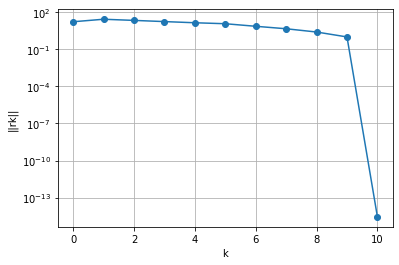

In [18]:
# Create example symmetric positive definite linear system
n = 10
A = -np.diag(np.ones(n-1), -1) + 2*np.diag(np.ones(n)) - \
    np.diag(np.ones(n-1), 1)
b = np.arange(n)
x0 = np.zeros((n,))
# Solve with CG
x, resids = conjugate_gradient(A, b, x0, tol=1e-5)
print("Final residual ||Ax-b|| =", np.linalg.norm(A@x - b))

# Plot decrease in residuals
plt.figure(1)
plt.clf()
plt.semilogy(resids, 'o-')
plt.grid()
plt.xlabel('k')
plt.ylabel('||rk||')
plt.show()


CG converges in 10 iterations and there is a drop in the value of error at 10th iteration.

## Lab Book 08

In [19]:
# Set the random number generator (for reproducibility)
np.random.seed(0)
# Build a random n*n orthogonal matrix of eigenvectors
n = 20
Q1 = np.linalg.qr(np.random.rand(n, n))[0]
Q2 = np.linalg.qr(np.random.rand(n, n))[0]
# Desired set of eigenvalues (need all > 0 for positive definite matrices)
evals1 = np.linspace(1, 1e5, n)
# evals2 = np.array([1,1,1,1
#                 ,1e2,1e2,1e2,1e2
#                 ,1e3,1e3,1e3,1e3
#                 ,1e4,1e4,1e4,1e4
#                 ,1e5,1e5,1e5,1e5])
# evals2 = np.array([1, 1e2, 1e3, 1e4, 1e5]*4)
evals2 = np.array([1, 1e5-3, 1e5-2, 1e5-1, 1e5]*4)
# Construct symmetric positive definite linear system with desired eigenvalues
A1 = Q1.T @ np.diag(evals1) @ Q1
A2 = Q1.T @ np.diag(evals2) @ Q1
b = np.arange(n)
x0 = np.zeros((n,))


The condition number k(A) of matrix A is defined by the absolute value of maximum eigenvalue divided by the smallest eigenvalue. Therefore, we can find the above two matrix by setting their maximum eigenvalue to 1e5 and minimum to 1. Then construct a square matrix with eigenvalues as its diagonal. By multiplying two othogonal matrices to the square matrix can give us the required matrices.

In [20]:
print(f"condition number of A1 is {np.linalg.cond(A1)}")
print(f"condition number of A2 is {np.linalg.cond(A2)}")

condition number of A1 is 100000.00000022692
condition number of A2 is 100000.00000133809


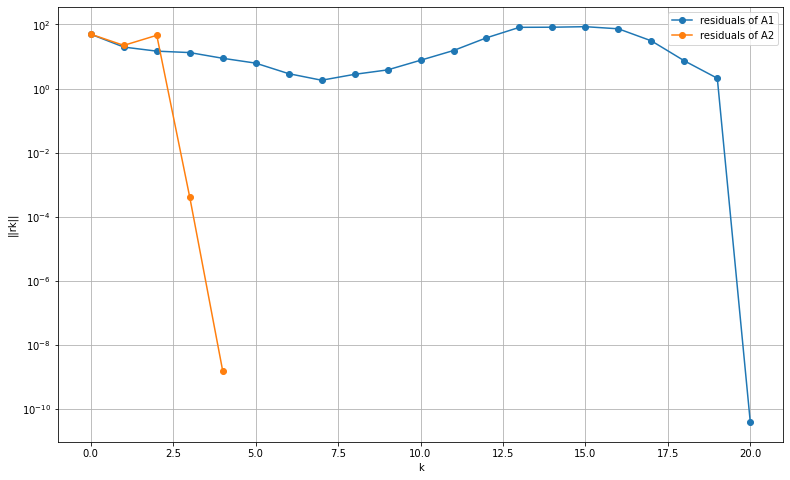

In [21]:
x0 = np.zeros((n,))
x1, resids1 = conjugate_gradient(A1, b, x0, tol=1e-5)
x2, resids2 = conjugate_gradient(A2, b, x0, tol=1e-5)
plt.figure(figsize=(13, 8))
plt.clf()
plt.semilogy(resids1, 'o-', label='residuals of A1')
plt.semilogy(resids2, 'o-', label='residuals of A2')
plt.legend(loc='best')
plt.grid()
plt.xlabel('k')
plt.ylabel('||rk||')
plt.show()


If we consider eigenvalues with relatively very small difference as a cluster, we can find that with same condition number, the matrix with fewer clusters will converge much faster. A1 has 20 clusters and needs exactly n = 20 itrations of CG to return the result while A2 only needs 5 iterations because there's only two clusters of eigenvalues.

In [22]:
print(f"start time: {t_start}\ntime1: {t_stop1}\ntime2: {t_stop2}")
print(time.process_time_ns())

NameError: name 't_start' is not defined

## Lab Book 09

In [23]:
# Column indices of the nonzero values
# They are ordered as: first column (top to bottom), first row (second to last column), diagonal (2nd entry to last entry).
# Note: the '+' operator appends lists: [1,2] + [3,4,5] gives [1,2,3,4,5]
col_idx = [0]*10 + list(range(1, 10)) + list(range(1, 10))
print(col_idx)
# Row indices of the nonzero values
row_idx = list(range(10)) + [0]*9 + list(range(1, 10))
# Values of the nonzero entries
values = list(range(1, 11)) + list(range(2, 11)) + list(range(2, 11))
print(f"values{values}")
# Form the sparse matrix
nrows, ncols = 10, 10  # dimensions of A
A = sparse.coo_matrix((values, (row_idx, col_idx)),
                      shape=(nrows, ncols), dtype=float)
print(f"A is\n{A}")
# Convert to CSR format for efficient linear algebra (if desired)
A = A.tocsr()
print(f"A' is\n{A}")
# Dimensions of a sparse matrix (same as NumPy arrays)
print("Dimensions =", A.shape)
# How many nonzero entries?
print("Number of nonzero entries =", A.nnz)
# The "sparsity" of a matrix is the fraction of entries which are nonzero
print("Sparsity =", A.nnz / (A.shape[0] * A.shape[1]))
# Convert to a regular NumPy array
# This is useful to check our code for col_idx, row_idx and values
# WARNING: do not do this for very large matrices (or you will run of memory)
A_as_dense_matrix = A.toarray()
print(A_as_dense_matrix)
# Create a sparse identity matrix the same size as A
I = sparse.eye(nrows)
A_plus_two_I = A + 2*I
# check answer correct by printing A+I as a dense matrix
print(A_plus_two_I.toarray())
# Matrix-vector multiplication
x = np.arange(nrows)
print("Ax =", A @ x)
print("A^T x =", A.T @ x)
# Matrix-matrix multiplication
A_times_I = A @ I
print(A_times_I.toarray())
print("Entry (1,1) is", A[1, 1])
print("Entry (-1, -2) is", A[-1, -2])
# Change an entry from zero to nonzero
A[-1, -2] = -5.5
print("Entry (-1, -2) is", A[-1, -2])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A is
  (0, 0)	1.0
  (1, 0)	2.0
  (2, 0)	3.0
  (3, 0)	4.0
  (4, 0)	5.0
  (5, 0)	6.0
  (6, 0)	7.0
  (7, 0)	8.0
  (8, 0)	9.0
  (9, 0)	10.0
  (0, 1)	2.0
  (0, 2)	3.0
  (0, 3)	4.0
  (0, 4)	5.0
  (0, 5)	6.0
  (0, 6)	7.0
  (0, 7)	8.0
  (0, 8)	9.0
  (0, 9)	10.0
  (1, 1)	2.0
  (2, 2)	3.0
  (3, 3)	4.0
  (4, 4)	5.0
  (5, 5)	6.0
  (6, 6)	7.0
  (7, 7)	8.0
  (8, 8)	9.0
  (9, 9)	10.0
A' is
  (0, 0)	1.0
  (0, 1)	2.0
  (0, 2)	3.0
  (0, 3)	4.0
  (0, 4)	5.0
  (0, 5)	6.0
  (0, 6)	7.0
  (0, 7)	8.0
  (0, 8)	9.0
  (0, 9)	10.0
  (1, 0)	2.0
  (1, 1)	2.0
  (2, 0)	3.0
  (2, 2)	3.0
  (3, 0)	4.0
  (3, 3)	4.0
  (4, 0)	5.0
  (4, 4)	5.0
  (5, 0)	6.0
  (5, 5)	6.0
  (6, 0)	7.0
  (6, 6)	7.0
  (7, 0)	8.0
  (7, 7)	8.0
  (8, 0)	9.0
  (8, 8)	9.0
  (9, 0)	10.0
  (9, 9)	10.0
Dimensions = (10, 10)
Number of nonzero entries = 28
Sparsity = 0.28
[[ 1.  

/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


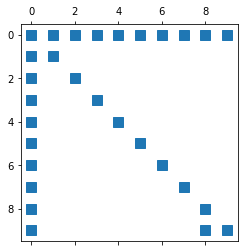

In [24]:
plt.figure(1)
plt.clf()
plt.spy(A)
plt.show()


In [25]:
def generate_sparse(n):
    base1 = list([7/2]*n)
    base2 = list([-4/3]*(n-1))
    base3 = list([1/12]*(n-2))
    A = sparse.diags([base1, base2, base2, base3, base3],
                     offsets=[0, 1, -1, 2, -2], format='csr', dtype='float')
    # A = A.tocsr()
    return A


In [26]:
n = 5
A = generate_sparse(n)
print(f"The CSR format of A is:\n{A}")
print(f"The {n}*{n} sparse matrix is:\n{A.toarray()}")
                

The CSR format of A is:
  (0, 0)	3.5
  (0, 1)	-1.3333333333333333
  (0, 2)	0.08333333333333333
  (1, 1)	3.5
  (1, 2)	-1.3333333333333333
  (1, 0)	-1.3333333333333333
  (1, 3)	0.08333333333333333
  (2, 2)	3.5
  (2, 3)	-1.3333333333333333
  (2, 1)	-1.3333333333333333
  (2, 4)	0.08333333333333333
  (2, 0)	0.08333333333333333
  (3, 3)	3.5
  (3, 4)	-1.3333333333333333
  (3, 2)	-1.3333333333333333
  (3, 1)	0.08333333333333333
  (4, 4)	3.5
  (4, 3)	-1.3333333333333333
  (4, 2)	0.08333333333333333
The 5*5 sparse matrix is:
[[ 3.5        -1.33333333  0.08333333  0.          0.        ]
 [-1.33333333  3.5        -1.33333333  0.08333333  0.        ]
 [ 0.08333333 -1.33333333  3.5        -1.33333333  0.08333333]
 [ 0.          0.08333333 -1.33333333  3.5        -1.33333333]
 [ 0.          0.          0.08333333 -1.33333333  3.5       ]]


## Lab Book 10

In [27]:
n = [10, 100, 1000]
times = np.zeros([len(n), 2])
times2 = np.zeros(len(n))
# niter = 50
# for k in range(niter):
for i in range(len(n)):
    b = np.arange(n[i])
    A = generate_sparse(n[i])
    t_start = time.time()
    x = linalg.solve(A.toarray(), b)
    t_stop1 = time.time()
    x = spsolve(A, b)
    t_stop2 = time.time()
    times[i] = list([t_stop1-t_start, t_stop2-t_stop1])
    print(f"n = {n[i]}\nnp.linalg.solve takes {times[i][0]} seconds\nscipy.sparse.linalg.spsolve takes {times[i][1]} seconds")



n = 10
np.linalg.solve takes 0.000247955322265625 seconds
scipy.sparse.linalg.spsolve takes 0.0028259754180908203 seconds
n = 100
np.linalg.solve takes 0.0020210742950439453 seconds
scipy.sparse.linalg.spsolve takes 0.0009870529174804688 seconds
n = 1000
np.linalg.solve takes 0.04650712013244629 seconds
scipy.sparse.linalg.spsolve takes 0.0013680458068847656 seconds


With the increasing of n, np.linalg.solve clearly takes more time, which takes about 100 times time when n = 1000 compared to n = 10.
However, spsolve almost takes similar time when n = 10, 100 and 1000.